# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
import plotly
import plotly.express as px

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных

import category_encoders as ce # импорт для работы с кодировщиком

# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

C:\Users\LesenaM\AppData\Local\Temp\ipykernel_18104\1947887270.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Итак, прочитаем нашу таблицу:

In [2]:
churn_data = pd.read_csv('data/churn.csv')
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Значения столбцов таблицы:

- RowNumber — номер строки таблицы;
- CustomerId — идентификатор клиента;
- Surname — фамилия клиента;
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
- Geography — страна проживания клиента (банк межнациональный);
- Gender — пол клиента;
- Age — возраст клиента;
- Tenure — сколько лет клиент пользуется банком;
- Balance — сколько у клиента денег на счетах в банке;
- NumOfProduct — число услуг банка, которыми воспользовался клиент;
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
- IsActiveMember — есть ли у клиента статус «активный клиент» (1 — да, 0 — нет);
- EstimatedSalary — предполагаемая заработная плата клиента;
- Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

In [3]:
# оценим распределение денежных средств на счетах клиентов в разрезе оттока
#Строим гистограмму с помощью Plotly
fig = px.histogram(
    data_frame=churn_data, 
    x='Balance', 
    color = 'Exited',
    height = 750, 
    width = 1000, 
    labels = {'Balance':'сумма в $', 'Exited':'Клиенты', 'count':'Количество клиентов'},
    title ='Распределение денежных средств на счетах клиентов в разрезе оттока клиентов',
    marginal = 'box',
    barmode  = 'group'
)
#Поправим подписи на осях и в легенде для повышения удобочитаемости
fig.update_layout(yaxis_title_text='Количество клиентов')
name_legend = {'0':'Лояльные', '1':'Ушедшие'}
fig.for_each_trace(lambda t: t.update(name = name_legend[t.name]))

fig.show()

> Такой график малоинформативен, да и клиенты с минимальным остатком на счетах не так интересны банку, как клиенты с высоким остатком, поэтому построим график для клиентов, остаток на счетах которых превышает 1000 $

In [4]:
#Сортируем данные, отбирая клиентов, у которых на счету более 1000 долларов
balance_data = churn_data[churn_data['Balance'] > 1000]

#Строим гистограмму с помощью Plotly
fig = px.histogram(
    data_frame=balance_data, 
    x='Balance', 
    color = 'Exited',
    height = 500, 
    width = 1000, 
    labels = {'Balance':'сумма в $', 'Exited':'Клиенты', 'count':'Количество клиентов'},
    title ='Распределение денежных средств на счетах клиентов в разрезе оттока клиентов',
    marginal = 'box',
    barmode  = 'group'
)
#Поправим подписи на осях и в легенде для повышения удобочитаемости
fig.update_layout(yaxis_title_text='Количество клиентов')
name_legend = {'0':'Лояльные', '1':'Ушедшие'}
fig.for_each_trace(lambda t: t.update(name = name_legend[t.name]))

fig.show()

> На графике прекрасно видно, что у лояльних клиентов сумма на счетах в основном колеблется от 39 тыс до 200 тыс долларов. При этом большая часть клиентов хранит на счетах от 100 до 140 тысяч долларов. 
У ушедших клиентов, сумма на счетах варьируется от 70 до 170 тысяч долларов, а большая часть клиентов хранит от 107 до 133 тысяч долларов. 

In [5]:
#Проанализируем возраст лояльных и ушедших клиентов.
#Строим гистограмму с помощью Plotly, в качестве значений выводим количество строк

fig = px.histogram(
    data_frame=balance_data, 
    x ='Age', 
    color = 'Exited',
    height = 500, 
    width = 1000, 
    labels = {'Age':'Возраст клиентов', 'Exited':'Тип клиентов'},
    title ='Распределение денежных средств на счетах клиентов в разрезе оттока клиентов',
    marginal = 'box',
    barmode  = 'group',
)

#Поправим подписи на осях и в легенде для повышения удобочитаемости
fig.update_layout(yaxis_title_text='Количество клиентов')
name_legend = {'0':'Лояльные', '1':'Ушедшие'}
fig.for_each_trace(lambda t: t.update(name = name_legend[t.name]))

fig.show()

> Средний возраст ушедших клиентов 45 лет. А половина из них в возрасте от 39 до 51 года. При этом средний возраст лояльных клиентов 36, а половина клиентов в возрасте от 31 до 41 года. Это говорит о том, что банку больше удаётся наладить взаимототношения с клиентами более молодого возраста. Это подтверждает и то, что доля лояльных клиентов до 30 значительно выше, чем у ушедших. 
Стоит отметить, что среди клиентов старше 70 (хотя их в целом не много), больше лояльных клиентов. Но это скорее связано с не желанием что-то менять у людей более старшего возраста. 

In [6]:
#Проанализируем как отток клиентов зависит от числа приобретённых у банка услуг.
#Построим многоуровневую столбчатую диаграмму
fig_NoF = px.histogram(balance_data, 
        x="Exited", 
        y="NumOfProducts", 
        histfunc='count', 
        color="NumOfProducts", 
        barmode='group',
        text_auto=True,
        width=800,
        title='Количество используемых услуг лояльными и ушедшими клиентами', 
        labels=dict(NumOfProducts='Количество продуктов', Exited='Тип клиента')
        )
#Переименуем ось Y и значения оси X
fig_NoF.update_layout(yaxis_title_text='Количество клиентов')
fig_NoF.update_xaxes(tickmode="array", ticktext=['Лояльные','Ушедшие'], tickvals=[0,1])

fig_NoF.show()

> По полученным данным можно сделать вывод, что ушедшие клиенты использовали большее количество услуг, а, следовательно, больше контактировали с сотрудниками банка. Причём лояльных клиентов, у которых приобретено 4 услуги вообще нет. Так же хорошо заметно, что доля ушедших клиентов среди тех, кто приобрёл 2 услуги значительно ниже, чем среди тех, кто приобрёл 1.

### Построение модели

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [7]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
display(churn_data.shape)

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [8]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
display(churn_data.head())

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [9]:
display(churn_data.isnull().sum())

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [10]:
display(churn_data[churn_data.duplicated()].sum())

CreditScore        0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

In [11]:
# создадим признаки 
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/churn_data['Age']
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/churn_data['Age']

#перекодируем текстовые признаки с помощью OneHotEncoder
encoder = ce.OneHotEncoder(cols=['Gender'], use_cat_names=True) 
type_bin = encoder.fit_transform(churn_data['Gender'])
churn_data = pd.concat([churn_data, type_bin], axis=1)

# удалим признак Gender
churn_data = churn_data.drop(['Gender'], axis=1)

#проверим полученные данные
display(churn_data.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
7,376,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517,1,0
15,616,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889,0,1
16,653,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621,0,1
26,756,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000,0,1
28,574,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837,1,0


Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [12]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [13]:
display(y.value_counts(normalize=True))

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 13)
Test shape: (628, 13)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [15]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


0    0.675704
1    0.324296
Name: Exited, dtype: float64



Test :


0    0.675159
1    0.324841
Name: Exited, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

При анализе данных мы видели, что данные имеют выбросы, поэтмоу для масштабирования признаков применим RobustScaler()

In [16]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

#кодируем исходные датасеты
X_train_r_scaler = r_scaler.fit_transform(X_train)
X_test_r_scaler = r_scaler.fit_transform(X_test)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
X_train_r_scaler = pd.DataFrame(X_train_r_scaler, columns=churn_data.columns.drop(["Exited"]))
X_test_r_scaler = pd.DataFrame(X_test_r_scaler, columns=churn_data.columns.drop(["Exited"]))

display(X_train_r_scaler.head())
display(X_test_r_scaler.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,1.028777,1.461538,-0.4,-0.074701,0.0,0.0,-1.0,-0.088021,0.035076,-0.557805,-0.422503,0.0,0.0
1,-0.359712,-0.923077,0.4,-0.406174,1.0,0.0,-1.0,-0.506907,0.551073,1.040904,0.862498,1.0,-1.0
2,1.323741,-1.384615,-0.2,0.135208,0.0,-1.0,-1.0,0.752928,-0.306004,0.529915,3.469360,0.0,0.0
3,-0.143885,0.769231,-0.8,-0.380850,0.0,0.0,0.0,0.466970,-0.296306,-0.792506,-0.532178,0.0,0.0
4,-0.194245,0.153846,-0.4,0.870327,1.0,0.0,-1.0,0.021129,0.143571,-0.392705,-0.188856,1.0,-1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,0.207547,0.214286,-0.500000,-0.815853,1.0,0.0,0.0,-1.009467,6.871307,-0.522258,-0.057237,0.0,0.0
1,-0.328302,0.214286,0.833333,1.351722,0.0,0.0,0.0,-0.043059,0.340614,0.852106,-0.293610,1.0,-1.0
2,-0.260377,-0.428571,-0.333333,1.047761,1.0,0.0,1.0,-0.479723,1.061975,-0.209903,0.292935,0.0,0.0
3,0.969811,-0.142857,-0.500000,-0.486572,1.0,0.0,0.0,0.988835,-0.485990,-0.475827,0.628129,1.0,-1.0
4,1.528302,0.000000,0.000000,-0.169987,0.0,0.0,0.0,-0.028019,-0.046483,0.059203,0.743052,1.0,-1.0


Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> Так как для заказчика важно минимизировать количество звонков и при этом сохранить как можно больше клиентов, то для этого лучше всего использовать метрику **F-мера**, которая зависит как от ложноотрицательных срабатываний, так и от ложноположительных. 
А значит вероятность определить клиентов, которые действительно хотят уйти повышается.

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

**Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

In [17]:
#Создаем объект класса логистическая регрессия, чтобы достигнуть сходимости увеличим количество итераций для 200
log_reg = linear_model.LogisticRegression(random_state=42, max_iter=200)
#Обучаем модель, минизируя logloss
log_reg.fit(X_train_r_scaler, y_train)
#Делаем предсказание класса
y_pred_train = log_reg.predict(X_train_r_scaler)
y_pred_test = log_reg.predict(X_test_r_scaler)

#Рассчитываем F1-меру
print('F1 score для тренировочной выборки: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
print('F1 score для тестовой выборки: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))


F1 score для тренировочной выборки: 0.51
F1 score для тестовой выборки: 0.14


> Мы получили модель, которая показала неплохой результат на тренировочных данных, но на тестовых данных показала очень низкие результаты по метрике, а значит, модель переобучена на тренировочных данных. Попробуем ввести регуляризацию l1 и l2, а затем попробовать изменить коэфициент регуляризации C чуть увеличив его и чуть уменьшив.

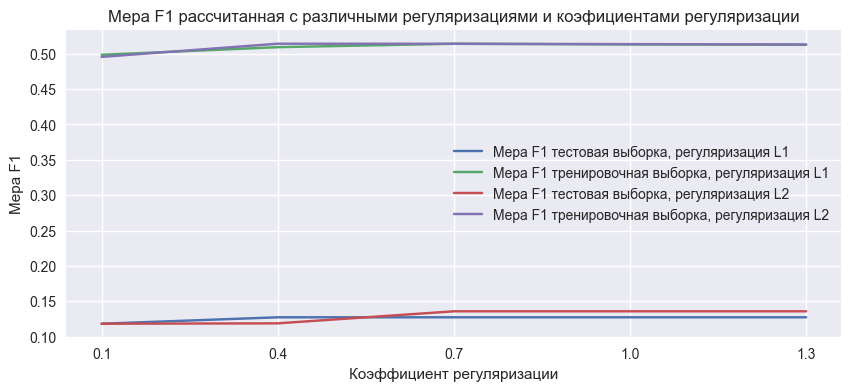

In [18]:
thresholds = np.arange(0.1, 1.5, 0.3)
F1_test_l1, F1_train_l1 = [], []
F1_test_l2, F1_train_l2 = [], []

for i in thresholds:
    #Создаем объект класса логистическая регрессия
    log_reg_l1 = linear_model.LogisticRegression(random_state=42, penalty="l1", C=i, max_iter=200, solver='liblinear')
    log_reg_l2 = linear_model.LogisticRegression(random_state=42, penalty="l2", C=i, max_iter=200)

    #Обучаем модель
    log_reg_l1.fit(X_train_r_scaler, y_train)
    log_reg_l2.fit(X_train_r_scaler, y_train)

    #Делаем предсказание класса и расчитываем метрику c регуляризацией L1
    y_pred_train_l1 = log_reg_l1.predict(X_train_r_scaler)
    y_pred_test_l1 = log_reg_l1.predict(X_test_r_scaler)
    F1_test_l1.append(metrics.f1_score(y_test, y_pred_test_l1))
    F1_train_l1.append(metrics.f1_score(y_train, y_pred_train_l1))

    #Делаем предсказание класса и расчитываем метрику c регуляризацией L2
    y_pred_train_l2 = log_reg_l2.predict(X_train_r_scaler)
    y_pred_test_l2= log_reg_l2.predict(X_test_r_scaler)
    F1_test_l2.append(metrics.f1_score(y_test, y_pred_test_l2))
    F1_train_l2.append(metrics.f1_score(y_train, y_pred_train_l2))


#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, F1_test_l1, label='Мера F1 тестовая выборка, регуляризация L1')
ax.plot(thresholds, F1_train_l1, label='Мера F1 тренировочная выборка, регуляризация L1')
ax.plot(thresholds, F1_test_l2, label='Мера F1 тестовая выборка, регуляризация L2')
ax.plot(thresholds, F1_train_l2, label='Мера F1 тренировочная выборка, регуляризация L2');
#Даём названия графику и осям
ax.set_title('Мера F1 рассчитанная с различными регуляризациями и коэфициентами регуляризации')
ax.set_xlabel('Коэффициент регуляризации')
ax.set_ylabel('Мера F1')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds)
#Отображаем легенду
ax.legend();

> Наполученных графиках видно, что при использовании регулярицации L2 и коэфициенте регуляризации выше 0,7 мы получаем данные с самой высокой метрикой F1-мера для тестовых данных. Но этот показатель всё равно очень низкий для использования модели.   

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

In [19]:
from sklearn import preprocessing
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train_r_scaler)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test_r_scaler)

#Создаем объект класса логистическая регрессия, чтобы достигнуть сходимости увеличим количество итераций до 500
log_reg = linear_model.LogisticRegression(random_state=42, solver='liblinear')
#Обучаем модель
log_reg.fit(X_train_poly, y_train)
#Делаем предсказание класса
y_pred_train = log_reg.predict(X_train_poly)
y_pred_test = log_reg.predict(X_test_poly)

#Рассчитываем F1-меру
print('F1 score для тренировочной выборки: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
print('F1 score для тестовой выборки: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))


F1 score для тренировочной выборки: 0.40
F1 score для тестовой выборки: 0.40


> После полиномизации признаков мы получили недообученную модель, но при этом метрика F1 на тестовой и тренировочной выборке равнозначна. Значит, модель уловила общую суть. Попробуем увеличить метрику с помощью применения регуляризации и изменения коэфициента регуляризации 

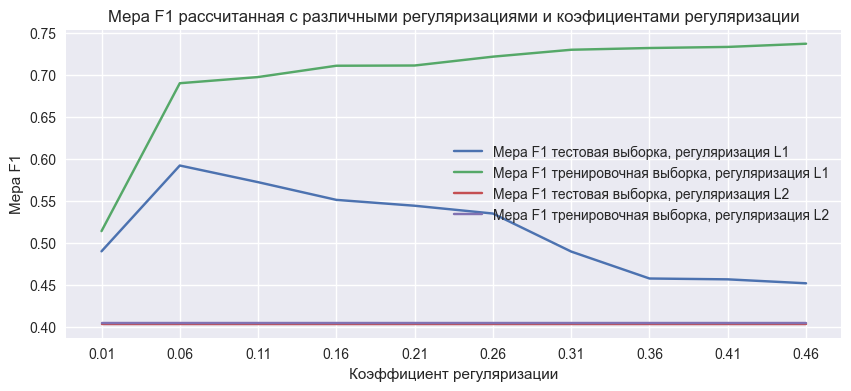

In [20]:
thresholds = np.arange(0.01, 0.5, 0.05)
F1_test_l1, F1_train_l1 = [], []
F1_test_l2, F1_train_l2 = [], []

for i in thresholds:
    #Создаем объект класса логистическая регрессия
    log_reg_l1 = linear_model.LogisticRegression(random_state=42, penalty="l1", C=i, max_iter=200, solver='liblinear')
    log_reg_l2 = linear_model.LogisticRegression(random_state=42, penalty="l2", C=i, max_iter=200, solver='liblinear')

    #Обучаем модель
    log_reg_l1.fit(X_train_poly, y_train)
    log_reg_l2.fit(X_train_poly, y_train)

    #Делаем предсказание класса и расчитываем метрику c регуляризацией L1
    y_pred_train_l1 = log_reg_l1.predict(X_train_poly)
    y_pred_test_l1 = log_reg_l1.predict(X_test_poly)
    F1_test_l1.append(metrics.f1_score(y_test, y_pred_test_l1))
    F1_train_l1.append(metrics.f1_score(y_train, y_pred_train_l1))

    #Делаем предсказание класса и расчитываем метрику c регуляризацией L2
    y_pred_train_l2 = log_reg_l2.predict(X_train_poly)
    y_pred_test_l2= log_reg_l2.predict(X_test_poly)
    F1_test_l2.append(metrics.f1_score(y_test, y_pred_test_l2))
    F1_train_l2.append(metrics.f1_score(y_train, y_pred_train_l2))


#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, F1_test_l1, label='Мера F1 тестовая выборка, регуляризация L1')
ax.plot(thresholds, F1_train_l1, label='Мера F1 тренировочная выборка, регуляризация L1')
ax.plot(thresholds, F1_test_l2, label='Мера F1 тестовая выборка, регуляризация L2')
ax.plot(thresholds, F1_train_l2, label='Мера F1 тренировочная выборка, регуляризация L2');
#Даём названия графику и осям
ax.set_title('Мера F1 рассчитанная с различными регуляризациями и коэфициентами регуляризации')
ax.set_xlabel('Коэффициент регуляризации')
ax.set_ylabel('Мера F1')
#Отображаем легенду
ax.legend()
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds);

> После применения регуляризации мы видим, что наибольшее значение метрики получаем при регуляризации L1 и коэффициенте регуляризации = 0.6. При этом, если и дальше повышать коэфициент регуляризации, то мы получаем переобученную модель, процент верных предсказаний которой растёт на тренировочных данных, но падает на тестовых. Регуляризация L2 не дала каких-то существенных изменений.

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


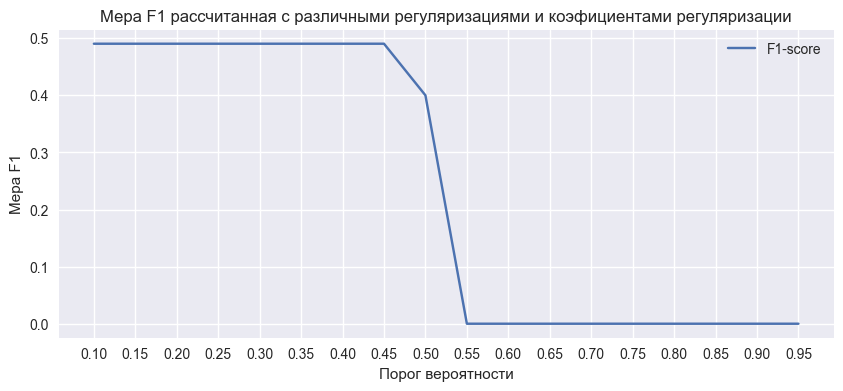

In [21]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(log_reg.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = metrics.f1_score(y_test, y_test_pred_poly) # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
    
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, scores, label='F1-score')

#Даём названия графику и осям
ax.set_title('Мера F1 рассчитанная с различными регуляризациями и коэфициентами регуляризации')
ax.set_xlabel('Порог вероятности')
ax.set_ylabel('Мера F1')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

На полученном графике видно, что при пороге 0,45 значительно падает метрика, а значит, стоит снизить порог вероятности для модели.

Расчитаем порог вероятности для модели с регуляризацей L1 и коэфициентом регуляризации = 0.6. 

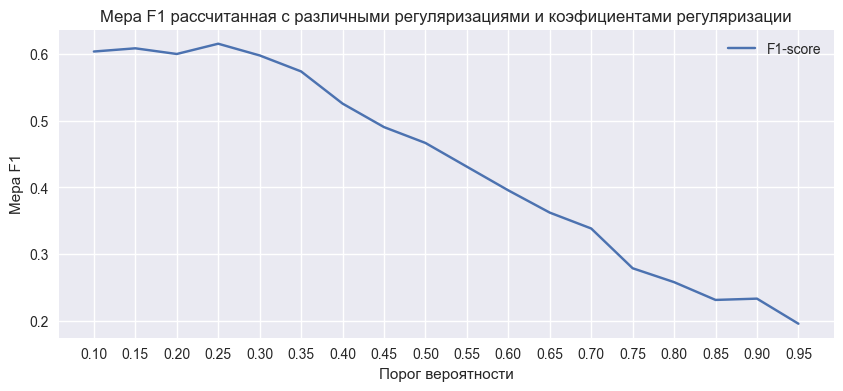

In [22]:
#Создаем объект класса логистическая регрессия
log_reg_l1 = linear_model.LogisticRegression(random_state=42, penalty="l1", C=0.6, max_iter=200, solver='liblinear')
#Обучаем модель
log_reg_l1.fit(X_train_poly, y_train)
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(log_reg_l1.predict_proba(X_test_poly)[:, 1])

# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = metrics.f1_score(y_test, y_test_pred_poly) # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
    
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, scores, label='F1-score')

#Даём названия графику и осям
ax.set_title('Мера F1 рассчитанная с различными регуляризациями и коэфициентами регуляризации')
ax.set_xlabel('Порог вероятности')
ax.set_ylabel('Мера F1')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

На полученном графике мы видим, что наибольшее значение метрики F1-мода достигается при пороге вероятности 0,25. по возможности стоит проверить эту модель на дополнительных тестовых данных с целью определения действительно ли стоит так сильно снижать порог вероятности.

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [23]:
display(churn_data.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
7,376,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517,1,0
15,616,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889,0,1
16,653,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621,0,1
26,756,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000,0,1
28,574,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837,1,0


In [24]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 13)
Test shape: (628, 13)


Импортируем необходимые для выполнения практики модули:

In [25]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


In [26]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий эффективности
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X_train, y_train)

#Делаем предсказание класса
y_pred_train = dt_clf_full.predict(X_train)
y_pred_test = dt_clf_full.predict(X_test)

#Рассчитываем F1-меру
print('F1 score для тренировочной выборки: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
print('F1 score для тестовой выборки: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))


F1 score для тренировочной выборки: 1.00
F1 score для тестовой выборки: 0.54


> Так как мы не ограничили глубину дерева и минимальное количество объектов в листе, то получили переобученную модель, которая полностью подстроилась под данные тренировочной выборки, поэтмоу на тестовой выборке показала результат хуже. Для улучшения модели необходимо внести изменения в модель.

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


In [27]:
#добавим максимальную глубину и минимальное количество объектов в листе к нашей модели
dt_clf_full1 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий эффективности
    max_depth = 8, #максимальная глубина
    min_samples_leaf = 10, #минимальное количество объектов в листе
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full1.fit(X_train, y_train)

#Делаем предсказание класса
y_pred_train = dt_clf_full1.predict(X_train)
y_pred_test = dt_clf_full1.predict(X_test)

#Рассчитываем F1-меру
print('F1 score для тренировочной выборки: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
print('F1 score для тестовой выборки: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))

F1 score для тренировочной выборки: 0.72
F1 score для тестовой выборки: 0.64


> Внесённые изменения принесли положительный результат. На полученных результатах видно, что хоть метрика на тренировочных данных снизилась, на тестовых данных она наоборот выросла, поэтмоу модель предсказывает данные намного лучше, чем раньше.

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


In [28]:
#Создаём объект класса RandomForest
rf_clf_full = ensemble.RandomForestClassifier(
    criterion='entropy', #критерий эффективности
    n_estimators=500, #число деревьев
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10, #Минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)

#Делаем предсказание класса
y_pred_train_rf = rf_clf_full.predict(X_train)
y_pred_test_rf = rf_clf_full.predict(X_test)
#Выводим отчёт о метриках
#Рассчитываем F1-меру
print('F1 score для тренировочной выборки: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train_rf)))
print('F1 score для тестовой выборки: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test_rf)))

F1 score для тренировочной выборки: 0.73
F1 score для тестовой выборки: 0.64


> С помощью RandomForest мы получили модель с сопоставимым результатом с DecisionTreeClassifier с внесёнными изменениями. Но так как время обучения модели DecisionTreeClassifier ниже, в дальнейшем будем использовать её. 

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

**Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

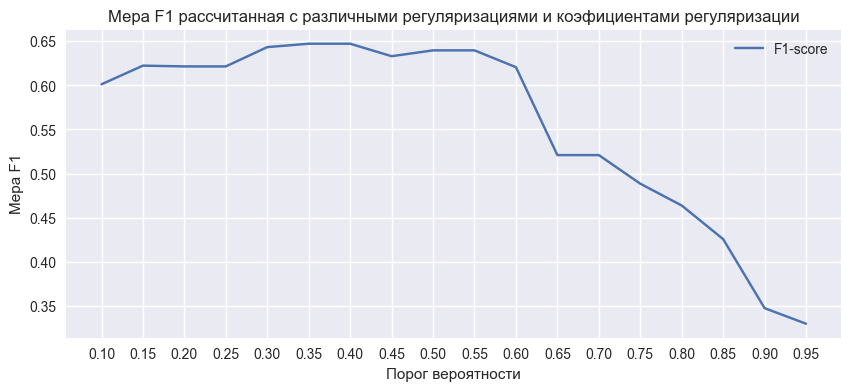

In [29]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(dt_clf_full1.predict_proba(X_test)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = metrics.f1_score(y_test, y_test_pred) # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
    
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, scores, label='F1-score')

#Даём названия графику и осям
ax.set_title('Мера F1 рассчитанная с различными регуляризациями и коэфициентами регуляризации')
ax.set_xlabel('Порог вероятности')
ax.set_ylabel('Мера F1')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

> На полученном графике видно, что при уменьшении порога веротности до 0.4 мы получаем наибольшее значение метрики F1-мера. Поэтому при использовании модели необходимо **снизить** порог вероятности 

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

**Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

In [30]:
client = {
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}

#преобразуем жанные о клиенте в Datarame
df_client = pd.DataFrame (client)

# создадим признаки 
df_client['BalanceSalaryRatio'] = df_client['Balance']/df_client['EstimatedSalary']
df_client['TenureByAge'] = df_client['Tenure']/df_client['Age']
df_client['CreditScoreGivenAge'] = df_client['CreditScore']/df_client['Age']

#Так как у нас данные только об 1 клиенте, а граф Gender должно получиться две, то преобразуем их с помощью Lambda-функций
df_client['Gender_Female'] = df_client['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df_client['Gender_Male'] = df_client['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# удалим признак Gender
df_client = df_client.drop(['Gender'], axis=1)

#проверим полученные данные
display(df_client.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,601.0,42.0,1.0,98495.72,1.0,1.0,0.0,40014.76,2.461485,0.02381,14.309524,0,1


In [31]:
#для предсказания воспользуемся моделью DecisionTreeClassifier с внесёнными изменениями и рассчитаем вероятность
y_pred_client = dt_clf_full1.predict_proba(df_client)[:, 1]

#по определённому выше порогу вероятности определим уйдёт клиент или останется
if y_pred_client < 0.4:
    print ('Вероятность, что клиент Василий уйдёт низкая')
else:
    print ('Вероятность, что клиент Василий уйдёт высокая')

Вероятность, что клиент Василий уйдёт высокая
